In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import polars as pl

In [2]:
# !pip install matplotlib
# !pip install polars
# !pip install pandas
# !pip install pyarrow
# !pip install fastparquet

In [3]:
start = time.time()
df = pd.read_json("arxiv.json", lines=True)
end = time.time()

print(f"time to read in pandas json: {end - start}s")

time to read in pandas json: 32.41287541389465s


In [4]:
start = time.time()
pl_df_parquet = pl.read_parquet("arxiv.parquet")
end = time.time()

print(f"time to read in  polars parquet not cleaned: {end - start}s")

time to read in  polars parquet not cleaned: 5.469616413116455s


In [5]:
start = time.time()
pd_df_parquet = pd.read_parquet("arxiv.parquet")
end = time.time()

print(f"time to read in pandas not cleaned: {end - start}s")

time to read in pandas not cleaned: 20.884845972061157s


In [6]:
start = time.time()
pd_df = pd.read_parquet("arxiv_cleaned.parquet")
end = time.time()

print(f"time to read in pandas parquet cleaned: {end - start}s")

time to read in pandas parquet cleaned: 0.09770607948303223s


In [7]:
start = time.time()
pl_df = pl.read_parquet("arxiv_cleaned.parquet")
end = time.time()

print(f"time to read in polars parquet cleaned: {end - start}s")

time to read in polars parquet cleaned: 0.10733175277709961s


# Algumas visuallizações iniciais

In [7]:
pd_df = pd.read_parquet("arxiv_cleaned.parquet")
pd_df

,id,submitter,title,comments,journal-ref,doi,report-no,categories,license,update_date,...,INTJ,NOUN,PROPN,VERB,lexical_diversity,legibility,number_of_authors,number_of_sentences,number_of_words,version_count
index,,,,,,,,,,,,,,,,,,,,,
7,0704.0008,Damian Swift,Numerical solution of shock and ramp compressi...,Minor corrections,"Journal of Applied Physics, vol 104, 073536 (2...",10.1063/1.2975338,"LA-UR-07-2051, LLNL-JRNL-410358",cond-mat.mtrl-sci,http://arxiv.org/licenses/nonexclusive-distrib...,2009-02-05,...,0,52,0,16,0.610738,15.51,15,6,149,3
376,0704.0377,Vladimir Pascalutsa,The lifetime of unstable particles in electrom...,"11 pages, 3 figs; published version","J.Phys.G36:045001,2009",10.1088/0954-3899/36/4/045001,ECT*-07-08,hep-ph hep-th nucl-th,http://arxiv.org/licenses/nonexclusive-distrib...,2009-09-01,...,0,40,5,11,0.537975,48.43,78,5,158,3
629,0704.0630,Evgeni Solodov P,"The $e^+ e^-\to K^+ K^- \pi^+\pi^-$, $K^+ K^- ...","32 pages, 46 postscript figures, submitted to ...","Phys.Rev.D76:012008,2007",10.1103/PhysRevD.76.012008,"BABAR-PUB-07/021, SLAC-PUB-12435",hep-ex,http://arxiv.org/licenses/nonexclusive-distrib...,2010-04-12,...,0,49,16,22,0.544601,57.00,41,8,213,3
928,0704.0929,Hyun Seok Yang,Noncommutative Electromagnetism As A Large N G...,"25 pages; More clarifications, to appear in Eu...","Eur.Phys.J.C64:445-457,2009",10.1140/epjc/s10052-009-1117-9,HU-EP-07/12,hep-th gr-qc hep-ph,http://arxiv.org/licenses/nonexclusive-distrib...,2009-11-05,...,0,32,31,11,0.518519,27.35,14,7,162,3
944,0704.0945,Peter McCullagh,Gibbs fragmentation trees,Published in at http://dx.doi.org/10.3150/08-B...,"Bernoulli 2008, Vol. 14, No. 4, 988-1002",10.3150/08-BEJ134,IMS-BEJ-BEJ134,math.PR math.ST stat.TH,http://arxiv.org/licenses/nonexclusive-distrib...,2008-11-14,...,0,26,14,6,0.598131,27.15,44,3,107,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448435,quant-ph/0607216,Arleta Szkola,The Chernoff lower bound for symmetric quantum...,Published in at http://dx.doi.org/10.1214/08-A...,"Annals of Statistics 2009, Vol. 37, No. 2, 104...",10.1214/08-AOS593,IMS-AOS-AOS593,quant-ph,http://arxiv.org/licenses/nonexclusive-distrib...,2009-04-30,...,0,32,6,14,0.598540,36.59,34,8,137,2
2449969,quant-ph/0701245,Mark A. Rubin,Signal-to-Noise Ratio in Squeezed-Light Laser ...,Typos corrected,"Appl. Opt. 48, 4597-4609 (2009)",10.1364/AO.48.004597,WW-13038,quant-ph,http://arxiv.org/licenses/nonexclusive-distrib...,2009-08-12,...,0,36,5,12,0.517544,42.92,30,5,114,4
2450064,quant-ph/0702094,Owen Maroney,Generalising Landauer's Principle,"29 pages, 4 figures. v4 Major changes to therm...","PHYSICAL REVIEW E 79, 031105 (2009)",10.1103/PhysRevE.79.031105,pi-foundqt-41,quant-ph cond-mat.stat-mech,http://arxiv.org/licenses/nonexclusive-distrib...,2009-11-30,...,0,32,5,18,0.566038,13.99,16,6,159,3


In [20]:
valores_medios = pd_df[["INTJ","NOUN","PROPN","VERB","lexical_diversity","legibility","number_of_authors","number_of_sentences","number_of_words","version_count"]].mean()
valores_maximos = pd_df[["INTJ","NOUN","PROPN","VERB","lexical_diversity","legibility","number_of_authors","number_of_sentences","number_of_words","version_count"]].max()
valores_minimos = pd_df[["INTJ","NOUN","PROPN","VERB","lexical_diversity","legibility","number_of_authors","number_of_sentences","number_of_words","version_count"]].min()

<Axes: >

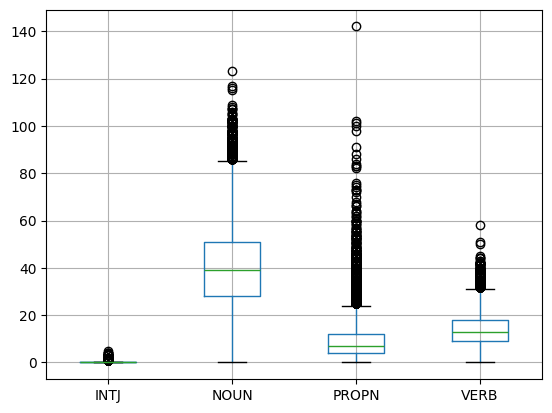

In [23]:
pd_df[["INTJ","NOUN","PROPN","VERB"]].boxplot()

<Axes: >

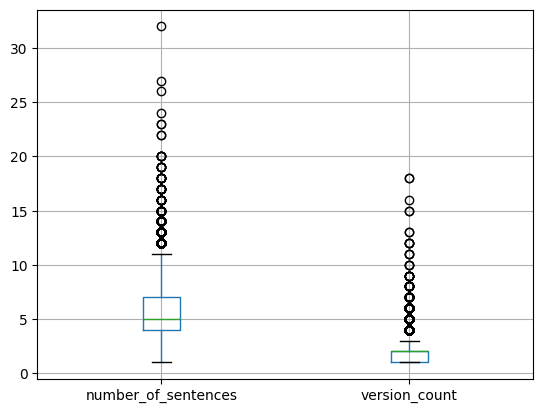

In [30]:
pd_df[["number_of_sentences","version_count"]].boxplot()

<Axes: >

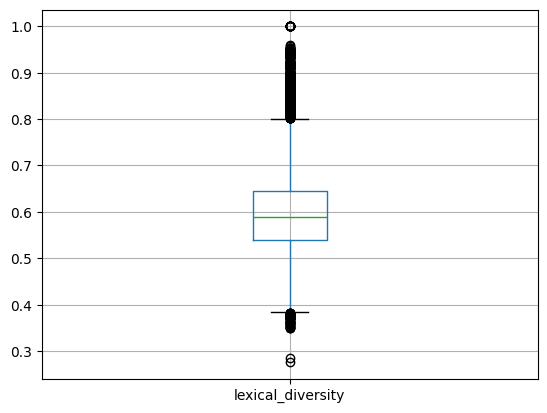

In [27]:
pd_df[["lexical_diversity"]].boxplot()

<Axes: >

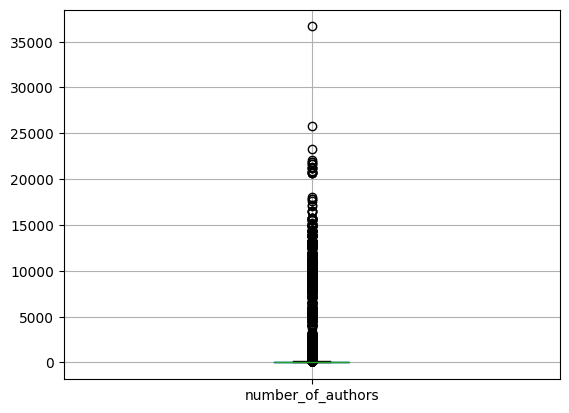

In [28]:
pd_df[["number_of_authors"]].boxplot()

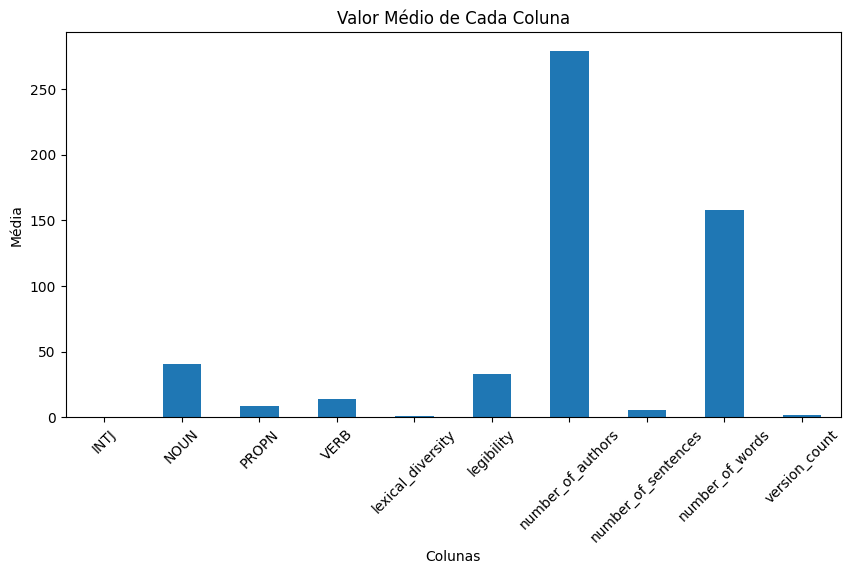

In [18]:
plt.figure(figsize=(10, 5))
valores_medios.plot(kind='bar')
plt.title('Valor Médio de Cada Coluna')
plt.xlabel('Colunas')
plt.xticks(rotation=45)
plt.show()

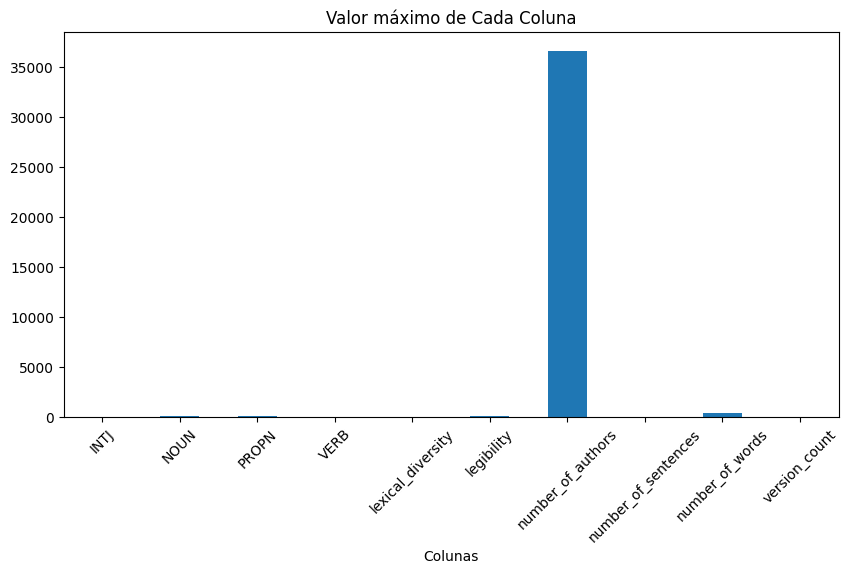

In [21]:
plt.figure(figsize=(10, 5))
valores_maximos.plot(kind='bar')
plt.title('Valor máximo de Cada Coluna')
plt.xlabel('Colunas')
plt.xticks(rotation=45)
plt.show()

In [11]:
pl_df = pl.read_parquet("arxiv_cleaned.parquet")

In [31]:
import requests
import tqdm
import concurrent.futures
import multiprocessing

def get_cited_references(doi):
    url = f"https://api.crossref.org/works/{doi}"
    response = requests.get(url)
    data = response.json()
    
    if response.status_code == 200 and 'reference' in data['message']:
        references = data['message']['reference']
        cited_dois = []
        
        for reference in references:
            cited_doi = reference.get('DOI')
            
            if cited_doi:
                cited_dois.append(cited_doi)
            
        return doi, cited_dois  # Return the doi along with the cited_dois
    else:
        return doi, None


manager = multiprocessing.Manager()
cited_dois_dict = manager.dict()

# Get the number of cores
num_cores = multiprocessing.cpu_count()

dois = [row[6] for row in pl_df.rows()]


with concurrent.futures.ThreadPoolExecutor(max_workers=num_cores) as executor:
    for doi, cited_dois in tqdm.tqdm(executor.map(get_cited_references, dois)):
        cited_dois_dict[doi] = cited_dois


286it [00:20, 14.03it/s]


KeyboardInterrupt: 

In [ ]:
cited_dois_dict

In [26]:
import requests

def get_cited_references(doi):
    url = f"https://api.crossref.org/works/{doi}"
    response = requests.get(url)
    data = response.json()

    if response.status_code == 200 and 'reference' in data['message']:
        references = data['message']['reference']
        cited_dois = []
        titles = []
        authors = []

        for reference in references:
            cited_doi = reference.get('DOI')
            title = reference.get('article-title', 'No title available')
            author = reference.get('author')

            if cited_doi:
                cited_dois.append(cited_doi)
            if title:
                titles.append(title)
            if author:
                authors.append(author)

        return cited_dois, titles, authors
    else:
        return None, None, None

cited_dois_list = []
titles_list = []
authors_list = []

# Example usage
for row in tqdm.tqdm(pl_df.rows()):
    doi = row[6]

    cited_dois, titles, authors = get_cited_references(doi)

    print("\r", doi, cited_dois, titles, authors, end="")

    if cited_dois:
        cited_dois_list.append(cited_dois)
        titles_list.append(titles)
        authors_list.append(authors)
    else:
        cited_dois_list.append('*')
        titles_list.append('*')
        authors_list.append('*')

  0%|          | 1/39853 [00:00<7:58:04,  1.39it/s]

 10.1063/1.2975338 ['10.1007/BF00350268', '10.1038/35089010', '10.1063/1.1394178', '10.1103/PhysRevB.64.214107', '10.1016/S0031-9201(98)00131-9', '10.1063/1.327799', '10.1063/1.1524706', '10.1016/0045-7825(92)90042-I', '10.1016/j.jmps.2005.09.003', '10.1063/1.1699639', '10.1103/RevModPhys.61.75', '10.1063/1.1876292', '10.1063/1.874029', '10.1103/PhysRevB.76.054122', '10.1103/PhysRevB.77.134104', '10.1063/1.2837045'] ['No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No tit

  0%|          | 2/39853 [00:01<7:55:11,  1.40it/s]

 10.1088/0954-3899/36/4/045001 ['10.1088/0954-3899/31/5/R01', '10.1088/0034-4885/70/5/R03', '10.1016/S0370-2693(98)00838-7', '10.1103/PhysRevLett.94.102003', '10.1103/PhysRevD.77.014027', '10.1088/0954-3899/33/1/001', '10.1063/1.2220418', '10.1063/1.2402647', '10.1063/1.2402605', '10.1103/PhysRevLett.82.904', '10.1103/PhysRevLett.97.131801', '10.1103/PhysRev.109.193', '10.1103/PhysRevLett.82.488', '10.1016/S0920-5632(96)90019-5', '10.1103/PhysRevC.65.045202', '10.1016/j.physrep.2006.09.006'] ['No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available'] ['Passera M', 'Miller J P', 'Holstein B R', 'Yao W M', 'Serebrov A P', 'Basdevant J 

  0%|          | 3/39853 [00:02<7:32:42,  1.47it/s]

 10.1103/PhysRevD.76.012008 ['10.1016/0370-2693(68)90279-7', '10.1088/1126-6708/1998/12/009', '10.1016/S0370-2693(99)00658-9', '10.1142/S021773239900273X', '10.1088/0954-3899/33/1/001', '10.1103/PhysRevLett.95.142001', '10.1140/epjc/s2003-01362-6', '10.1016/j.physletb.2005.08.068', '10.1103/PhysRevD.69.011103', '10.1103/PhysRevD.70.072004', '10.1103/PhysRevD.71.052001', '10.1103/PhysRevD.73.052003', '10.1016/0370-2693(82)91267-9', '10.1103/PhysRevD.74.091103', '10.1016/S0168-9002(01)02012-5', '10.1007/s100520000553', '10.1088/1126-6708/1997/10/001', '10.1007/BF03035898', '10.1016/0370-2693(94)90743-9', '10.1016/0010-4655(91)90012-A', '10.1016/S0168-9002(03)01368-8', '10.1016/0010-4655(94)90132-5', '10.1016/0010-4655(94)00091-F', '10.1016/j.physletb.2004.12.041', '10.1016/S0370-2693(02)01838-5'] ['No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title availab

  0%|          | 4/39853 [00:02<7:38:23,  1.45it/s]

 10.1140/epjc/s10052-009-1117-9 ['10.1103/RevModPhys.73.977', '10.1016/S0370-1573(03)00059-0', '10.1088/0264-9381/23/22/R01', '10.1142/S0217732307023675', '10.1023/B:MATH.0000027508.00421.bf', '10.1088/0264-9381/9/1/008', '10.1088/1126-6708/2001/08/032', '10.1088/1126-6708/1999/09/032', '10.1016/0550-3213(74)90154-0', '10.1103/PhysRevD.55.5112', '10.1016/S0550-3213(97)00290-3', '10.4310/ATMP.1998.v2.n2.a1', '10.1023/A:1026654312961', '10.1016/S0370-2693(98)00377-3', '10.4310/ATMP.1998.v2.n2.a2', '10.1016/j.physletb.2006.01.072', '10.1103/PhysRevLett.96.201602', '10.1088/0264-9381/7/9/006', '10.1088/1126-6708/2004/10/025', '10.1103/PhysRevD.74.084014', '10.1088/1126-6708/2000/09/003', '10.1016/S0550-3213(99)00633-1', '10.1016/0550-3213(83)90244-4', '10.1016/0550-3213(84)90542-X', '10.1103/PhysRevD.66.025021', '10.1007/BF01224131', '10.1007/BF01218161', '10.1063/1.529513', '10.1215/S0012-7094-95-07716-3', '10.1016/0370-2693(78)90478-1', '10.1088/0264-9381/22/17/011', '10.1088/0264-9381/2

  0%|          | 5/39853 [00:03<7:44:35,  1.43it/s]

 10.3150/08-BEJ134 ['10.1214/aop/1176990534', '10.1007/s10955-006-9261-1', '10.1007/s004400100152', '10.1007/s00440-003-0295-x', '10.1214/193940307000000374', '10.1214/07-AOP377', '10.1214/08-AOP434', '10.3150/08-BEJ134'] ['No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available'] []

  0%|          | 6/39853 [00:04<7:30:41,  1.47it/s]

 10.1214/08-AOS646 ['10.1214/009053604000000067', '10.1111/j.2517-6161.1996.tb02080.x', '10.1198/016214506000000735', '10.1016/j.csda.2006.12.019', '10.1214/009053606000000281', '10.1214/009053606000001523', '10.1214/009053606000000092', '10.3150/bj/1106314846', '10.1111/j.1467-9868.2008.00674.x', '10.1214/009053607000000631', '10.1002/cpa.20132', '10.1016/j.cct.2005.05.006', '10.1093/biomet/90.3.491', '10.1109/TIT.2004.834793', '10.1109/TIT.2005.864420', '10.1214/07-AOS520', '10.1214/07-AOS582', '10.7551/mitpress/1754.001.0001'] ['No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available'] [

  0%|          | 7/39853 [00:04<7:09:35,  1.55it/s]

 10.1214/08-AAP544 ['10.1007/978-1-4684-9477-8', '10.2139/ssrn.1314771', '10.1002/9780470316658', '10.1086/262109', '10.1007/BF00699109', '10.1111/1467-937X.00168', '10.1214/105051604000000251', '10.1016/j.jbankfin.2004.06.003', '10.1017/S1365100500015029', '10.1016/S0378-4266(99)00053-9', '10.1007/BF02179656', '10.1080/713665730', '10.1007/s00780-003-0107-2', '10.1098/rsta.1994.0057', '10.1016/S0378-4266(02)00265-0', '10.1016/j.jbankfin.2003.11.002', '10.1016/j.jedc.2005.01.004', '10.1016/S0378-4266(99)00054-0', '10.1016/j.jebo.2005.02.005', '10.2139/ssrn.183588', '10.1007/978-1-4684-0392-3', '10.1007/978-3-540-73327-0_5'] ['No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title avail

  0%|          | 8/39853 [00:05<7:25:47,  1.49it/s]

 10.1103/PhysRevD.76.023512 ['10.1016/0370-2693(86)91126-3', '10.1016/0370-2693(85)91028-7', '10.1016/0370-2693(77)90435-X', '10.1103/PhysRevLett.44.912', '10.1146/annurev.nucl.55.090704.151558', '10.1016/0370-2693(80)90058-1', '10.1103/PhysRevD.22.2860', '10.1016/0370-2693(80)90825-4', '10.1016/0550-3213(81)90354-0', '10.1103/PhysRevD.22.2227', '10.1103/PhysRevD.23.165', '10.1016/j.nuclphysb.2004.10.049', '10.1103/PhysRevD.49.2118', '10.1103/PhysRevLett.80.5716', '10.1016/S0550-3213(01)00109-2', '10.1016/j.physletb.2005.11.007', '10.1103/PhysRevD.58.071702', '10.1103/PhysRevD.63.097902', '10.1016/j.physletb.2003.11.061', '10.1016/j.physletb.2004.07.009', '10.1088/1126-6708/2006/01/117', '10.1016/S0550-3213(01)00346-7', '10.1088/1126-6708/2001/08/029', '10.1016/S0370-2693(02)02310-9', '10.1103/PhysRevD.70.073010', '10.1103/PhysRevD.70.063511', '10.1103/PhysRevD.71.013006', '10.1103/PhysRevD.70.053009', '10.1016/j.nuclphysb.2005.07.005', '10.1103/PhysRevD.72.075009', '10.1016/j.nuclphys

  0%|          | 9/39853 [00:06<7:34:08,  1.46it/s]

 10.1214/08-AOP399 ['10.1016/S0304-4149(98)00081-7', '10.1016/S0304-4149(02)00089-3', '10.1007/s00440-006-0038-x', '10.1214/aoms/1177692642', '10.1007/BF02392040', '10.1006/jmva.1995.1011', '10.1214/aop/1176996444', '10.1007/978-3-540-39874-5_2'] ['No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available'] []

  0%|          | 10/39853 [00:06<7:20:08,  1.51it/s]

 10.1103/PhysRevD.78.011502 ['10.1103/PhysRevLett.84.238', '10.1103/PhysRevD.67.034503', '10.1103/PhysRevD.65.054505', '10.1103/PhysRevD.67.059901', '10.1103/PhysRevLett.85.4674', '10.1103/PhysRevLett.90.029902', '10.1103/PhysRevD.68.054502', '10.1016/0550-3213(85)90606-6', '10.1103/PhysRevD.73.034501', '10.1103/PhysRevD.72.054510', '10.1103/PhysRevD.70.031504', '10.1103/PhysRevD.70.114501', '10.1103/PhysRevD.65.094507', '10.1088/1126-6708/2007/04/092', '10.1103/PhysRev.183.1245', '10.1088/0954-3899/33/1/001', '10.1103/PhysRevD.58.074505', '10.1016/S0920-5632(03)02525-8', '10.1016/0370-2693(92)91537-J', '10.1103/PhysRevD.58.074501', '10.1103/PhysRevD.68.054508', '10.1103/PhysRevD.73.014511', '10.1103/PhysRevD.73.094501', '10.1016/S0550-3213(97)00107-7', '10.1016/0370-2693(96)01147-1'] ['No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No t

  0%|          | 11/39853 [00:07<7:12:29,  1.54it/s]

 10.1016/j.cpc.2007.07.001 ['10.1016/S0370-2693(99)00777-7', '10.1016/S0370-2693(99)01277-0', '10.1016/S0370-2693(01)01382-X', '10.1016/j.nuclphysbps.2006.03.003', '10.1088/1126-6708/2006/10/031', '10.1016/j.cpc.2006.07.002', '10.1016/j.nuclphysb.2006.05.033', '10.1016/j.nuclphysbps.2004.09.040', '10.1103/PhysRevLett.97.181601', '10.1016/j.nuclphysb.2006.08.007', '10.1016/j.nuclphysb.2006.12.014', '10.1016/S0010-4655(99)00532-9', '10.1103/PhysRevD.28.1542', '10.1103/PhysRevD.71.073009', '10.1063/1.1471366', '10.1016/j.cpc.2005.12.014'] ['No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title availab

  0%|          | 12/39853 [00:08<7:22:51,  1.50it/s]

 10.1103/PhysRevD.79.066001 ['10.1016/0370-2693(96)00345-0', '10.1016/S0370-1573(02)00271-5', '10.4310/ATMP.1999.v3.n5.a6', '10.1016/S0370-2693(96)01460-8', '10.1007/BF02099774', '10.1088/1126-6708/2008/03/060', '10.1103/PhysRevD.70.106007', '10.1016/0550-3213(95)00467-7', '10.1088/1126-6708/2007/08/058', '10.1088/1126-6708/2005/05/023', '10.1007/s00220-007-0407-z', '10.1016/S0550-3213(98)00847-5', '10.1088/1126-6708/2005/10/096', '10.1088/1126-6708/2006/02/024', '10.1103/PhysRevD.54.1514', '10.1088/1126-6708/2006/10/036', '10.1103/PhysRevD.48.R3427', '10.1088/1126-6708/2007/08/094', '10.1088/1126-6708/2007/04/091', '10.1088/1126-6708/2007/06/007', '10.1007/s002200050087', '10.1016/S0550-3213(96)00640-2', '10.1088/1126-6708/2004/07/047', '10.4310/ATMP.1998.v2.n1.a8', '10.1007/978-1-4757-3069-2', '10.1016/0550-3213(95)00307-E', '10.1016/0370-2693(95)00937-G', '10.1016/0550-3213(95)00605-2', '10.1142/S0129167X93000248', '10.1016/S0370-2693(97)00146-9', '10.1016/0370-2693(95)01074-Z', '10

  0%|          | 13/39853 [00:08<7:00:08,  1.58it/s]

 10.1214/00-AOS576 ['10.1214/009053606000000074', '10.1214/aos/1046294464', '10.1214/aos/1028674843', '10.1214/aos/1176325498', '10.1214/aos/1030741083', '10.1016/j.anihpb.2003.11.006', '10.1016/j.anihpb.2005.04.004', '10.1214/aos/1015951994', '10.3150/bj/1077544602', '10.1214/aos/1016120365', '10.1214/009053607000000055', '10.1214/009053606000001587', '10.1007/b99352', '10.1214/aos/1032181164', '10.1214/aos/1030741088', '10.2307/3316011', '10.1214/009053604000000030', '10.1214/07-AOS546', '10.1214/009053606000001019', '10.1007/978-3-540-45167-9_23', '10.1198/016214501753168262', '10.1007/978-1-4613-0125-7', '10.1007/s00440-007-0119-5'] ['No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'N

  0%|          | 14/39853 [00:09<7:30:25,  1.47it/s]

 10.1214/07-AAP488 ['10.1007/978-1-4684-0302-2', '10.1007/978-1-4615-6569-7', '10.1007/978-3-662-06400-9', '10.1007/978-1-4757-4296-1', '10.1525/9780520325340-004', '10.1007/s00780-007-0060-6', '10.1007/BF02124750', '10.2307/3212009', '10.1214/aos/1176345781', '10.2307/3318547', '10.1214/aos/1176345878', '10.1111/j.1467-9965.1996.tb00122.x', '10.1007/BF00343738', '10.3905/jod.2001.319153', '10.1007/s11222-006-9001-z', '10.1111/j.1467-9965.1992.tb00033.x', '10.1239/jap/1032374752', '10.1216/jiea/1181074930', '10.1093/biomet/41.3-4.351', '10.1214/aoms/1177696787', '10.1111/1467-9965.00024', '10.2307/1427397', '10.1214/aoms/1177698626'] ['No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No t

  0%|          | 15/39853 [00:10<7:37:54,  1.45it/s]

 10.1214/07-AAP508 ['10.1145/1109557.1109655', '10.1145/1132516.1132538', '10.1023/A:1004573003122', '10.1002/rsa.20004', '10.1007/978-3-540-48115-7_2', '10.1007/s10955-004-2055-4'] ['No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available'] []

  0%|          | 16/39853 [00:10<7:50:46,  1.41it/s]

 10.1214/10-AOP548 ['10.5948/UPO9781614440222', '10.1214/07-AIHP126', '10.1007/s00440-006-0498-z', '10.1007/s00440-006-0013-6', '10.1214/EJP.v12-456', '10.1007/BF02096987', '10.1007/s00220-008-0659-2', '10.1007/s00440-005-0430-y', '10.1016/0003-4916(83)90071-4', '10.1214/aop/1015345767', '10.1007/s002200050080', '10.1016/0003-4916(84)90083-6', '10.1007/s10955-007-9465-z', '10.1098/rspa.2007.1876', '10.1007/BF02509796', '10.1002/cpa.3160450602', '10.1007/s00440-006-0050-1', '10.1214/154957806000000050', '10.1007/978-3-642-84659-5', '10.1007/BF01210789', '10.1214/09-AOP481'] ['No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', '

  0%|          | 17/39853 [00:11<8:05:12,  1.37it/s]

 10.1142/S0217732309027303 ['10.1086/300499', '10.1086/307221', '10.1142/S021827180600942X', '10.1016/S0370-2693(01)00571-8', '10.1016/S0370-2693(02)01716-1', '10.1016/0370-2693(93)91002-5', '10.1023/A:1015266421750', '10.1016/j.physletb.2003.08.017', '10.1016/S0370-2693(03)00038-8', '10.1088/0264-9381/21/15/003', '10.1103/PhysRevD.67.063003', '10.1051/0004-6361:20040236', '10.1103/PhysRevD.69.123524', '10.1103/PhysRevD.70.083519', '10.1086/519988', '10.1142/S0217732306021530', '10.1111/j.1365-2966.2004.08189.x', '10.1016/j.physletb.2004.12.071', '10.1016/j.physletb.2006.08.039', '10.1103/PhysRevD.74.103505', '10.1103/PhysRevD.74.043506', '10.1016/j.physletb.2006.05.075', '10.1088/6102/44/4/762', '10.1142/S0218271805007486', '10.1103/PhysRevD.72.123515', '10.1088/0264-9381/22/16/005', '10.1103/PhysRevD.72.123507', '10.1016/j.physletb.2006.01.043', '10.1142/S0217732305017445', '10.1016/j.physletb.2005.01.017', '10.1016/j.physletb.2006.01.066', '10.1103/PhysRevD.72.043524', '10.1016/j.ph

  0%|          | 18/39853 [00:12<8:01:35,  1.38it/s]

 10.4007/annals.2010.173.1.3 ['10.2307/2154434', '10.1090/S0894-0347-07-00583-8', '10.1007/s00209-007-0114-7', '10.1017/S0305004108001515', '10.1090/S0273-0979-1993-00432-4', '10.4171/RMI/176', '10.1017/S0305004198003387', '10.1112/jlms/jdp042', '10.1090/pspum/072.1/2112116', '10.1017/S014338570000225X', '10.1017/S0143385700003655', '10.1112/jlms/s2-36.3.458', '10.5802/aif.1318', '10.1007/BF02559517', '10.1016/S0764-4442(99)80321-8', '10.2307/2000602', '10.1112/jlms/jdq014', '10.1007/s11511-009-0042-y', '10.1112/blms/bdm053', '10.1090/S0002-9939-09-10104-1', '10.1090/S0002-9939-04-07805-0', '10.1215/S0012-7094-07-13625-1', '10.1007/978-3-642-13171-4_5', '10.1112/S0024610702003897', '10.1307/mmj/1060013195', '10.1090/S0273-0979-98-00755-1'] ['No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No tit

  0%|          | 19/39853 [00:13<7:43:22,  1.43it/s]

 10.1088/1126-6708/2007/06/082 ['10.1016/j.nuclphysb.2005.02.014', '10.1103/PhysRevD.73.055017', '10.1088/1126-6708/2007/01/066', '10.1016/j.nuclphysb.2004.07.009', '10.1103/PhysRevD.75.115007', '10.1016/S0370-2693(01)00061-2', '10.1016/S0550-3213(02)00836-2', '10.1016/S0550-3213(99)00010-3', '10.1016/S0550-3213(99)00645-8', '10.1016/j.nuclphysb.2003.09.010', '10.1016/0550-3213(93)90535-W', '10.1016/0370-2693(93)90699-I', '10.1016/0550-3213(92)90345-C', '10.1016/0550-3213(93)90397-8', '10.1016/0550-3213(93)90398-9', '10.1016/0550-3213(94)90118-X', '10.1088/1126-6708/2004/01/048', '10.1016/j.nuclphysbps.2004.04.173', '10.1088/1126-6708/2002/07/034', '10.1088/1126-6708/2003/09/051', '10.1088/1126-6708/2004/08/061', '10.1103/RevModPhys.68.1125', '10.1088/0954-3899/33/1/001', '10.1016/j.ppnp.2006.06.001', '10.1088/1126-6708/2001/10/037', '10.1016/j.nuclphysbps.2004.11.256', '10.1016/S0920-5632(01)01698-X', '10.1103/PhysRevD.74.034510', '10.1103/PhysRevD.74.014509', '10.1103/PhysRevD.68.114

  0%|          | 20/39853 [00:13<7:43:39,  1.43it/s]

 10.1016/j.nuclphysb.2011.07.004 ['10.1103/PhysRevD.36.1587', '10.1103/PhysRevLett.57.2244', '10.1016/0550-3213(88)90143-5', '10.1088/0264-9381/14/10/002', '10.1088/0264-9381/8/1/010'] ['No title available', 'New Hamiltonian formulation of general relativity', 'New variables for classical and quantum gravity', 'No title available', 'No title available', '(2+1)-dimensional gravity as an exactly soluble system', 'No title available', 'No title available', 'Real and complex connections for canonical gravity', 'Spinors and Space–Time', 'No title available', 'A pure spin-connection formulation of gravity', 'Instanton representation of Plebanski gravity. Gravitational instantons from the classical formalism'] ['Ashtekar', 'Ashtekar', 'Ashtekar', 'Freedman', 'Bauer', 'Witten', 'Wald', 'Blagojevic', 'Immirzi', 'Penrose', 'Stephani', 'Capovilla', 'Ita']

  0%|          | 21/39853 [00:14<7:47:01,  1.42it/s]

 10.1088/0954-3899/36/12/125007 ['10.1142/9789812810458_0011', '10.1146/annurev.nucl.52.050102.090637', '10.1016/j.ppnp.2005.09.002', '10.1146/annurev.nucl.54.070103.181239', '10.1016/S0370-2693(99)00991-0', '10.1016/j.nuclphysb.2006.10.001', '10.1103/PhysRevC.72.054006', '10.1143/PTP.114.77', '10.1016/S0375-9474(98)00585-5', '10.1103/PhysRevC.68.041001', '10.1016/j.nuclphysa.2004.09.107', '10.1103/PhysRevC.63.024001', '10.1140/epja/i2006-10002-4', '10.1103/PhysRevC.53.2661', '10.1103/PhysRevLett.85.2905', '10.1016/S0370-2693(99)01075-8', '10.1016/0370-2693(90)90938-3', '10.1016/0550-3213(91)90231-L', '10.1103/PhysRevC.74.034004', '10.1103/PhysRevC.76.064003', '10.1016/0029-5582(58)90136-6', '10.1016/S0375-9474(01)00927-7', '10.1103/PhysRevC.73.024002', '10.1103/PhysRevC.63.044002', '10.1103/PhysRevC.66.054002', '10.1016/S0370-2693(01)00433-6', '10.1016/j.physletb.2006.03.072', '10.1103/PhysRevC.51.38', '10.1103/PhysRevC.49.2950'] ['No title available', 'No title available', 'No title 

  0%|          | 22/39853 [00:15<7:50:51,  1.41it/s]

 10.1088/1126-6708/2009/03/051 None None None

  0%|          | 23/39853 [00:15<7:53:07,  1.40it/s]

 10.1103/PhysRevD.78.064039 ['10.1080/001075198181838', '10.1016/j.nuclphysb.2003.11.007', '10.1103/PhysRevLett.88.101101', '10.1016/S0370-2693(98)00860-0', '10.1103/RevModPhys.74.825', '10.1016/0003-4916(86)90186-7', '10.1103/PhysRevD.68.064011', '10.1088/0264-9381/22/7/017', '10.1063/1.1705193', '10.1023/A:1026286607562', '10.1088/1126-6708/2003/11/035', '10.1103/PhysRevD.71.084028', '10.1088/1126-6708/2007/06/006', '10.1088/1126-6708/2006/12/074', '10.1088/0264-9381/23/20/R01'] ['No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available'] []

  0%|          | 24/39853 [00:16<7:57:19,  1.39it/s]

 10.3150/08-BEJ139 ['10.1007/s11139-006-6510-5', '10.2307/1996491', '10.1137/0505008', '10.1017/S1446788700011393', '10.1137/0506050', '10.1080/00949659708811867', '10.1137/S0036144501394387', '10.1007/BF00531524', '10.1016/j.probengmech.2007.05.002', '10.1216/RMJ-1987-17-4-719', '10.1007/s00033-007-7027-5', '10.1016/j.spl.2006.05.013', '10.1016/j.exmath.2005.01.002', '10.1006/jmva.1999.1864', '10.1007/978-3-642-66128-0', '10.1080/01621459.2011.646928', '10.1007/978-1-4899-2937-2', '10.1007/s00041-008-9057-6', '10.1007/978-1-4615-7892-5', '10.2307/1968466', '10.1007/978-1-4612-1494-6'] ['No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title 

  0%|          | 25/39853 [00:17<7:30:26,  1.47it/s]

 10.1007/s10714-008-0640-6 ['10.1088/0264-9381/22/9/002', '10.1088/0264-9381/1/4/002', '10.1088/0264-9381/17/2/101', '10.1016/0003-4916(74)90404-7', '10.1088/0264-9381/22/17/001', '10.1103/PhysRevD.75.084032', '10.1007/BF01213209', '10.1016/0550-3213(83)90480-7', '10.1103/PhysRevD.50.846', '10.1103/PhysRevD.61.084027', '10.1088/1126-6708/2006/03/083', '10.1103/PhysRevLett.77.4109', '10.1016/S0550-3213(02)00251-1', '10.1103/PhysRevD.55.5957', '10.1088/0264-9381/22/2/013', '10.1103/PhysRevD.75.084041', '10.1088/0264-9381/15/8/006', '10.1016/S0550-3213(99)00392-2', '10.1088/0264-9381/17/22/312', '10.1103/PhysRevLett.84.1647', '10.1103/PhysRevD.62.044002', '10.1103/PhysRevD.74.064002', '10.1088/1126-6708/1998/07/023', '10.1007/s002200050764', '10.1103/PhysRevD.71.044016', '10.1088/1126-6708/2007/04/073', '10.1007/BF01205790', '10.1016/j.geomphys.2004.05.001', '10.1103/PhysRev.114.924', '10.7208/chicago/9780226870373.001.0001', '10.1063/1.527249', '10.1007/BF01211590', '10.1016/0003-4916(86

  0%|          | 26/39853 [00:17<7:39:10,  1.45it/s]

 10.1214/07-AOP385 ['10.1016/0047-259X(83)90019-2', '10.3150/bj/1155735933', '10.1007/BF00535673', '10.1007/BF02451428', '10.1214/aop/1068646366', '10.1007/978-3-0348-8681-9_13', '10.1016/j.spa.2006.05.016', '10.1007/s10959-007-0083-0', '10.1007/978-3-540-77913-1_8', '10.1214/EJP.v13-534', '10.1090/conm/336/06025', '10.1214/009117907000000196', '10.1007/BF00535674', '10.1214/09-AIHP342'] ['No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available'] []

  0%|          | 27/39853 [00:18<7:43:19,  1.43it/s]

 10.1103/PhysRevD.77.094505 ['10.1016/j.nuclphysbps.2004.11.357', '10.1103/PhysRevD.72.054506', '10.1103/PhysRevD.73.054503', '10.1103/PhysRevLett.96.052001', '10.1103/PhysRevLett.97.012001', '10.1016/j.physletb.2007.05.062', '10.1016/j.nuclphysb.2006.12.023', '10.1103/PhysRevD.75.094501', '10.1103/PhysRevLett.98.052003', '10.1103/PhysRevD.74.114503', '10.1103/PhysRevD.74.114509', '10.1016/j.nuclphysa.2007.07.006', '10.1103/PhysRevD.67.114505', '10.1103/PhysRevD.70.034508', '10.1016/j.nuclphysa.2005.07.011', '10.1103/PhysRevD.72.054502', '10.1103/PhysRevD.71.114508', '10.1103/PhysRevD.72.094501', '10.1103/PhysRevD.73.074510', '10.1103/PhysRevD.74.034514', '10.1103/PhysRevD.75.034502', '10.1103/PhysRevD.75.054501', '10.1016/0370-2693(92)91112-M', '10.1016/0550-3213(93)90162-I', '10.1016/0550-3213(95)00031-M', '10.1016/0370-2693(93)90636-V', '10.1016/0550-3213(95)00111-5', '10.1016/S0370-2693(97)01368-3', '10.1103/PhysRevLett.79.3595', '10.1103/PhysRevD.68.114506', '10.1103/PhysRevD.68.0

  0%|          | 28/39853 [00:19<7:19:33,  1.51it/s]

 10.1103/PhysRevD.78.025025 ['10.1103/PhysRevD.46.1453', '10.1017/CBO9780511661396', '10.1103/PhysRevD.73.024015', '10.1103/PhysRevD.52.5865', '10.1103/PhysRevD.55.826', '10.1103/PhysRevD.13.1592', '10.1016/0550-3213(94)90053-1', '10.1016/S0370-2693(97)00338-9', '10.1016/S0550-3213(98)00179-5', '10.1098/rspa.1931.0130', '10.1103/PhysRev.74.817', '10.1103/PhysRev.173.1536', '10.1103/PhysRev.176.1489', '10.1063/1.3128805', '10.1016/0003-4916(73)90096-1', '10.1016/0003-4916(76)90112-3', '10.1016/0003-4916(74)90404-7', '10.1103/PhysRevD.50.846', '10.1103/PhysRevD.15.2752', '10.1088/0264-9381/7/8/020', '10.1007/BF01028566', '10.1515/9780691213866', '10.1103/PhysRevLett.72.957', '10.1143/PTPS.66.1', '10.1007/BF00670985', '10.1007/BF00670778'] ['No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title 

  0%|          | 29/39853 [00:19<7:38:49,  1.45it/s]

 10.1016/j.physletb.2008.06.056 ['10.1016/j.nuclphysb.2004.08.037', '10.1103/PhysRevD.74.116002', '10.1103/PhysRevD.66.115013', '10.1103/PhysRevD.25.2869', '10.1016/0370-2693(88)91248-8', '10.1007/BF01561291', '10.1103/PhysRevLett.70.138', '10.1016/0370-2693(95)01045-R', '10.1103/PhysRevD.55.R3919', '10.1103/PhysRevD.61.071101', '10.1016/S0168-9002(01)02013-7', '10.1016/S0168-9002(02)01771-0', '10.1103/PhysRevLett.92.171802', '10.1016/j.physletb.2005.03.028', '10.1103/PhysRevLett.95.041802', '10.1103/PhysRevLett.96.041801', '10.1016/S0010-4655(00)00048-5', '10.1016/S0168-9002(02)01164-6', '10.1016/S0168-9002(01)02113-1', '10.1016/S0168-9002(00)00305-3', '10.1103/PhysRevD.67.012002'] ['No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available',

  0%|          | 30/39853 [00:20<7:23:33,  1.50it/s]

 10.1088/1475-7516/2009/01/015 ['10.1086/304888', '10.1093/mnras/282.2.347', '10.1086/312696', '10.1046/j.1365-8711.2003.06321.x', '10.1111/j.1365-2966.2004.07395.x', '10.1111/j.1365-2966.2004.08304.x', '10.1086/345788', '10.1111/j.1365-2966.2005.09581.x', '10.1086/505696', '10.1086/382712', '10.1086/500124', '10.1086/163867', '10.1086/424914', '10.1086/423992', '10.1086/378633', '10.1051/0004-6361:20030306', '10.1086/382146', '10.1086/428122', '10.1086/427079', '10.1086/377356', '10.1086/428340', '10.1086/383293', '10.1086/382726', '10.1111/j.1365-2966.2006.10935.x', '10.1086/308744', '10.1046/j.1365-8711.2001.04029.x', '10.1086/422897', '10.1086/430636', '10.1111/j.1365-2966.2005.09269.x', '10.1051/0004-6361:20031696', '10.1086/592400', '10.1086/519237', '10.1086/173325', '10.1086/345399', '10.1093/mnras/287.4.833', '10.1111/j.1365-2966.2005.09523.x', '10.1111/j.1365-2966.2006.10043.x', '10.1086/426782', '10.1111/j.1365-2966.2005.09624.x'] ['No title available', 'No title available',

  0%|          | 31/39853 [00:21<7:10:57,  1.54it/s]

 10.1016/j.jfa.2010.05.018 ['10.1137/070684628', '10.1090/S0002-9947-03-03136-2', '10.1007/BF01952785', '10.1137/0910063', '10.1016/j.laa.2009.11.002', '10.1137/0707001', '10.1023/B:BITN.0000014563.33622.1d', '10.1090/S0002-9947-1937-1501907-0', '10.1090/S0002-9947-1969-0251519-5', '10.1017/S1446788700026707', '10.1137/S1064827500377332', '10.1016/j.laa.2005.06.032', '10.1137/060649070', '10.1137/08072574X', '10.1137/040613044', '10.1216/rmjm/1181069874', '10.1090/S0002-9939-1987-0870792-X', '10.1090/S0002-9939-1977-0442703-6', '10.1090/S0894-0347-02-00398-3'] ['Bounds on changes in Ritz values for a perturbed invariant subspace of a Hermitian matrix', 'Accelerating the convergence of the method of alternating projections', 'On the spectra of sums of orthogonal projections with applications to parallel computing', 'To overlap or not to overlap: a note on a domain decomposition method for elliptic problems', 'A gentle guide to the basics of two projections theory', 'Separation of two li

  0%|          | 32/39853 [00:21<7:04:34,  1.56it/s]

 10.1051/0004-6361:200810819 ['10.1111/j.1365-2966.2004.08005.x', '10.1111/j.1365-2966.2007.11439.x', '10.1046/j.1365-8711.1999.02968.x', '10.1086/503025', '10.1086/191028', '10.1111/j.1365-2966.2004.07699.x', '10.1086/510736', '10.1086/162070', '10.1086/151605', '10.1111/j.1365-2966.2004.08397.x', '10.1111/j.1365-2966.2005.09915.x', '10.1086/522916', '10.1046/j.1365-8711.2002.05197.x', '10.1093/mnras/276.2.679', '10.1103/PhysRevLett.78.3426', '10.1046/j.1365-8711.1999.02124.x', '10.1051/0004-6361:20011620', '10.1086/163498', '10.1051/0004-6361:20030922', '10.1111/j.1365-2966.2006.10270.x', '10.1086/508602', '10.1086/177173', '10.1086/173365', '10.1086/520325', '10.1046/j.1365-8711.1998.01285.x', '10.1086/381722'] ['No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title a

  0%|          | 33/39853 [00:22<7:00:41,  1.58it/s]

 10.1088/1126-6708/2007/07/016 ['10.1016/0550-3213(74)90355-1', '10.1016/0550-3213(81)90006-7', '10.1016/0550-3213(82)90071-2', '10.1007/BF01573998', '10.1016/0550-3213(81)90522-8', '10.1016/0550-3213(82)90565-X', '10.1016/0550-3213(88)90171-X', '10.1016/0370-2693(91)90980-5', '10.1016/0370-2693(91)91641-8', '10.1103/PhysRevD.44.817', '10.1142/S0217732391001883', '10.1016/0370-1573(95)00058-5', '10.1016/j.physrep.2004.08.031', '10.1088/1126-6708/2005/06/073', '10.1016/j.nuclphysb.2004.08.001', '10.1103/PhysRevD.71.015013', '10.1016/0370-1573(85)90051-1', '10.1016/0370-1573(84)90008-5', '10.1016/j.cpc.2006.11.009', '10.1016/S0010-4655(01)00460-X', '10.1016/S0010-4655(03)00222-4', '10.1103/PhysRevD.70.117703', '10.1016/S0550-3213(96)00683-9', '10.1103/PhysRevD.70.075006', '10.1103/PhysRevD.72.055010', '10.1016/S0010-4655(97)00123-9', '10.1016/j.cpc.2005.01.012', '10.1103/PhysRevLett.49.970', '10.1016/0370-2693(82)90685-2', '10.1103/PhysRevD.27.2359', '10.1143/PTP.70.542', '10.1103/PhysRe

  0%|          | 34/39853 [00:23<7:16:08,  1.52it/s]

 10.3150/09-BEJ193 ['10.1007/978-1-4612-0493-0', '10.1093/oso/9780198522195.001.0001', '10.2307/2528966', '10.1093/biomet/asm007', '10.1214/aos/1176349407', '10.1214/009053606000001235', '10.1214/08-AOS619'] ['No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available'] []

  0%|          | 35/39853 [00:23<7:09:02,  1.55it/s]

 10.1214/08-AOP423 ['10.1137/0308012', '10.1137/0309034', '10.1214/aop/1041903216', '10.1007/978-3-662-59107-9', '10.1214/aop/1024404416', '10.1016/j.crma.2006.05.019', '10.1017/S002190020001411X', '10.1016/S0167-7152(01)00178-X', '10.1007/s004400050214', '10.1007/978-3-540-44644-6_4', '10.1016/j.anihpb.2004.12.002', '10.1007/978-0-387-35359-3_33', '10.1142/9789812703989_0021', '10.1111/1467-9965.00022'] ['No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available'] []

  0%|          | 36/39853 [00:24<7:32:06,  1.47it/s]

 10.1103/PhysRevD.76.046006 ['10.1088/1126-6708/2007/05/032', '10.1103/PhysRevD.58.125003', '10.1016/0370-2693(84)90669-5', '10.1016/0370-2693(85)90153-4', '10.1088/1126-6708/2002/01/047', '10.1088/0264-9381/12/2/004', '10.1088/0264-9381/16/1/001', '10.1103/PhysRevD.55.R3246', '10.1103/PhysRevD.65.087501', '10.1088/0264-9381/20/21/005', '10.1088/0264-9381/20/3/303', '10.1143/PTP.117.533', '10.1088/1126-6708/2007/06/007', '10.1088/1126-6708/2007/04/091', '10.1016/j.physletb.2005.04.026', '10.1088/0264-9381/21/12/013', '10.1088/0264-9381/23/23/C01', '10.1016/S0550-3213(99)00750-6'] ['No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available'] []

  0%|          | 37/39853 [00:25<7:28:56,  1.48it/s]

 10.1214/08-AAP550 ['10.1145/1132516.1132597', '10.1112/S0025579300014364', '10.1007/BF02392695', '10.1007/s002200050036', '10.1214/aop/1008956330', '10.1525/9780520350694-012', '10.1093/biomet/57.1.97', '10.4007/annals.2009.169.903', '10.1007/s00209-002-0466-y', '10.1016/j.jfa.2008.11.001', '10.1007/s11511-006-0002-8', '10.1007/s11511-006-0003-7', '10.1007/978-3-540-71050-9', '10.1007/s00220-002-0777-1', '10.1002/cpa.20060'] ['No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available'] []

  0%|          | 38/39853 [00:25<7:16:48,  1.52it/s]

 10.1103/PhysRevD.77.045021 ['10.1103/PhysRev.96.191', '10.1016/0370-2693(67)90067-6', '10.1016/0550-3213(71)90395-6', '10.1007/BF01614158', '10.1016/0003-4916(76)90156-1', '10.1007/BF02730284', '10.1016/0370-2693(78)90765-7', '10.1007/BF01090719', '10.1016/0550-3213(71)90297-5', '10.1016/0003-4916(76)90225-6', '10.1016/0370-2693(81)90205-7', '10.1016/0370-2693(83)90645-7', '10.1103/PhysRevD.28.2567', '10.1103/PhysRevD.30.508', '10.1016/0550-3213(84)90227-X', '10.1063/1.526780', '10.1016/0370-1573(94)00112-G', '10.1103/PhysRevD.12.482', '10.1103/PhysRevD.12.3159', '10.1103/PhysRevD.12.467', '10.1016/0031-9163(64)91136-9', '10.1103/PhysRevLett.13.508', '10.1103/PhysRev.145.1156', '10.1103/PhysRevLett.13.321', '10.1103/PhysRevLett.13.585', '10.1103/PhysRev.155.1554', '10.1103/PhysRevD.5.3121', '10.1103/PhysRevD.5.3137', '10.1103/PhysRevD.8.4654', '10.1016/0550-3213(71)90139-8', '10.1016/0550-3213(72)90279-9', '10.1016/S0550-3213(72)80021-X', '10.1088/1126-6708/2005/08/048', '10.1007/s107

  0%|          | 39/39853 [00:26<7:28:07,  1.48it/s]

 10.1088/1126-6708/2007/09/063 ['10.4310/ATMP.1998.v2.n2.a1', '10.1016/S0370-2693(98)00377-3', '10.4310/ATMP.1998.v2.n2.a2', '10.1143/PTP.113.843', '10.1143/PTP.114.1083', '10.1088/1126-6708/2002/06/043', '10.1088/1126-6708/2003/07/049', '10.1103/PhysRevD.69.066007', '10.1103/PhysRevD.69.065020', '10.1103/PhysRevLett.95.261602', '10.1016/j.nuclphysb.2005.05.009', '10.1016/j.physletb.2006.10.019', '10.1088/1126-6708/2007/05/062', '10.1016/j.physletb.2007.01.030', '10.1103/PhysRevLett.87.081601', '10.1103/PhysRevLett.94.111601', '10.1103/PhysRevLett.98.101601', '10.1103/PhysRevD.73.045013', '10.1088/1126-6708/2006/09/020', '10.1088/1126-6708/2006/12/075', '10.1016/j.physletb.2006.12.049', '10.1016/j.physletb.2005.01.020', '10.1103/PhysRevD.74.126005', '10.1103/PhysRevLett.97.182301', '10.1103/PhysRevD.74.046006', '10.1088/1126-6708/2006/09/039', '10.1088/1126-6708/2006/07/013', '10.1103/PhysRevLett.96.132301', '10.1103/PhysRevLett.93.090602', '10.1016/j.physletb.2005.01.052', '10.1103/Ph

  0%|          | 40/39853 [00:27<7:35:45,  1.46it/s]

 10.1086/525270 ['10.1086/423931', '10.1051/0004-6361:20065351', '10.1086/518221', '10.1016/j.nima.2007.09.048', '10.1051/0004-6361:20030279', '10.1086/312342', '10.1016/0168-9002(91)90802-W', '10.1086/160771', '10.1016/S0927-6505(01)00162-1', '10.1093/mnras/278.2.525', '10.1051/0004-6361:20030593', '10.1103/PhysRevLett.79.2616', '10.1038/319127a0', '10.1016/j.nima.2003.08.157', '10.1046/j.1365-8711.2000.03250.x', '10.1023/A:1010933404324', '10.1086/163829', '10.1086/163830', '10.1086/172024', '10.1038/221525a0', '10.1086/316401', '10.1086/159561', '10.1086/174896', '10.1086/171706', '10.1086/176726', '10.1086/337991', '10.1086/184380', '10.1086/305219', '10.1016/0927-6505(94)90036-1', '10.1038/296833a0', '10.1103/PhysRevLett.15.577', '10.1086/171844', '10.1086/156486', '10.1086/344132', '10.1086/306005', '10.1086/319038', '10.1086/517510', '10.1086/322468', '10.1086/162356', '10.1086/162357', '10.1016/0927-6505(95)00044-5', '10.1016/S0927-6505(00)00133-X', '10.1086/308495', '10.1086/1

  0%|          | 41/39853 [00:27<7:43:42,  1.43it/s]

 10.1103/PhysRevD.78.103510 10.1103/PhysRevD.80.129907 ['10.1103/PhysRevLett.79.4736', '10.1103/PhysRevD.59.023508', '10.1016/S0370-2693(99)00132-X', '10.1088/1126-6708/2004/09/033', '10.1088/1475-7516/2003/10/013', '10.1103/PhysRevD.68.103514', '10.1046/j.1365-8711.2003.06568.x', '10.1051/0004-6361:20040274', '10.1080/00107510500165204', '10.1088/1475-7516/2006/09/007', '10.1103/PhysRevLett.100.021301', '10.1088/1126-6708/2001/07/047', '10.1088/1126-6708/2002/01/036', '10.1088/1126-6708/2002/07/051', '10.1016/S0370-2693(02)01824-5', '10.1088/1475-7516/2004/03/010', '10.1088/1126-6708/2004/06/013', '10.1016/j.physletb.2005.03.053', '10.1088/1126-6708/2005/08/092', '10.1016/j.physletb.2006.07.034', '10.1088/1751-8113/40/25/S49', '10.1016/S0370-2693(03)00592-6', '10.1088/1126-6708/2005/10/013', '10.1103/PhysRevD.71.123513', '10.1103/PhysRevD.57.3317', '10.1086/311074', '10.1016/0550-3213(85)90439-0', '10.1103/PhysRevD.33.872', '10.1103/PhysRevD.40.973', '10.1103/PhysRevLett.64.119', '10.

  0%|          | 42/39853 [00:28<7:26:54,  1.48it/s]

 10.1214/08-AOS652 ['10.3150/bj/1116340297', '10.1080/01621459.1988.10478718', '10.1088/0266-5611/21/4/010', '10.1002/cjs.5550340305', '10.2307/3314852', '10.1111/j.2517-6161.1993.tb01920.x', '10.1080/01621459.1997.10474005', '10.1214/aos/1176348248', '10.2307/3315465', '10.1109/18.986021', '10.2307/3318449', '10.1006/jmva.2001.2015', '10.1093/biomet/92.1.135', '10.1214/aos/1051027875', '10.1089/cmb.2006.13.63', '10.2307/2298119', '10.1006/jmva.2000.1968', '10.1080/00949659608811735', '10.2307/3315482', '10.1137/S0036141092238060', '10.1137/S0036139994264476', '10.1088/0266-5611/21/6/003', '10.1080/00036818408839508', '10.1080/10485259708832708', '10.1016/j.jmva.2006.09.012', '10.1214/aoms/1177704472', '10.1214/aos/1017939249', '10.1016/0167-7152(90)90061-B', '10.1137/S0036142994269411', '10.1214/aos/1176347627', '10.1111/j.1467-9469.2009.00653.x'] ['No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No title available', 'No ti

  0%|          | 42/39853 [00:29<7:39:24,  1.44it/s]


KeyboardInterrupt: 